In [2]:
import pandas as pd
import numpy as np

In [3]:
# 读取数据
thes = pd.read_csv('data/basis.csv', encoding='gbk')
comp = pd.read_csv('data/composition.csv', encoding='gbk')
unca = pd.read_csv('data/uncategorized.csv', encoding='gbk')
new_comp = pd.read_csv('n_data/new_comp.csv', encoding='gbk')

In [4]:
# (第一问)
# 检查数据的有效性
from solution import Solution
sol = Solution()
sol.effectiveness(comp)

01采样点数据为：97.61,该数据合格
02采样点数据为：99.88999999999999,该数据合格
03部位1采样点数据为：100.0,该数据合格
03部位2采样点数据为：98.88,该数据合格
04采样点数据为：96.06000000000002,该数据合格
05采样点数据为：96.50999999999999,该数据合格
06部位1采样点数据为：98.92000000000003,该数据合格
06部位2采样点数据为：98.84000000000002,该数据合格
07采样点数据为：99.69999999999999,该数据合格
08采样点数据为：99.82000000000001,该数据合格
08严重风化点采样点数据为：98.24000000000001,该数据合格
09采样点数据为：99.76999999999998,该数据合格
10采样点数据为：99.81,该数据合格
11采样点数据为：95.39,该数据合格
12采样点数据为：99.57000000000002,该数据合格
13采样点数据为：98.13999999999999,该数据合格
14采样点数据为：99.0,该数据合格
15采样点数据为：79.47000000000001,该数据不合格
16采样点数据为：98.40999999999998,该数据合格
17采样点数据为：71.89,该数据不合格
18采样点数据为：97.24999999999999,该数据合格
19采样点数据为：98.75999999999999,该数据合格
20采样点数据为：88.41,该数据合格
21采样点数据为：98.52,该数据合格
22采样点数据为：99.99999999999997,该数据合格
23未风化点采样点数据为：96.5,该数据合格
24采样点数据为：98.88000000000001,该数据合格
25未风化点采样点数据为：97.06,该数据合格
26采样点数据为：99.82,该数据合格
26严重风化点采样点数据为：99.89000000000001,该数据合格
27采样点数据为：98.81000000000002,该数据合格
28未风化点采样点数据为：98.69000000000003,该数据合格
29未风化点采样点数据为：99.88,该数据合格
30部位1采样点数据为：97.94999999999999

['15', '17']

In [5]:
# 设置数据不省略
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

C:\Users\34282\AppData\Local\Temp\ipykernel_7472\1907252589.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [15]:
# 对化学成分进行统计学分析

# 填充缺失值
new_comp.fillna(0, inplace=True)

# 对数据进行分组并排序
group_comp = new_comp.groupby(['类型','表面风化'])
sorted_df = new_comp.sort_values(by=['类型', '表面风化'])

# 保存数据
sorted_df.to_csv('data/group_comp.csv', index=False)

# 概括
summary = group_comp.describe()
summary.to_csv('data/summary.csv')

# 均值
group_comp.fillna(0, inplace=True)
mean = group_comp.mean()
mean.loc['铅钡（风化-无风化）'] = mean.iloc[1, :] - mean.iloc[0, :]
mean.loc['高钾（风化-无风化）'] = mean.iloc[3, :] - mean.iloc[2, :]
mean.to_csv('data/均值表.csv')

C:\Users\34282\AppData\Local\Temp\ipykernel_7472\3561202114.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.fillna is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_comp.fillna(0, inplace=True)
C:\Users\34282\AppData\Local\Temp\ipykernel_7472\3561202114.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean = group_comp.mean()


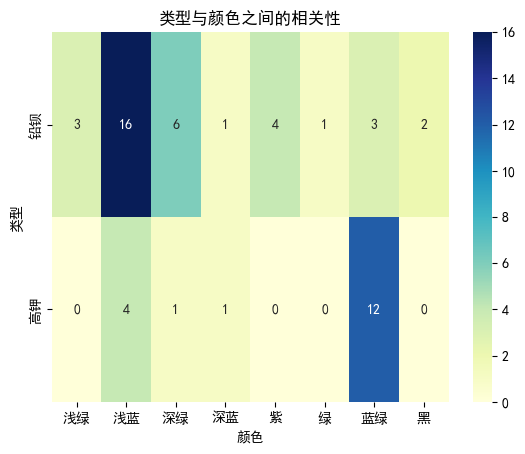

In [7]:
# 检查数据的相关性并绘图
sol.correlation(thes, '类型', '颜色')

纹饰     A     B   C   
类型    铅钡 高钾 高钾  铅钡 高钾
表面风化                 
无风化   5   6  0  7   6
风化    11  0  6  17  0


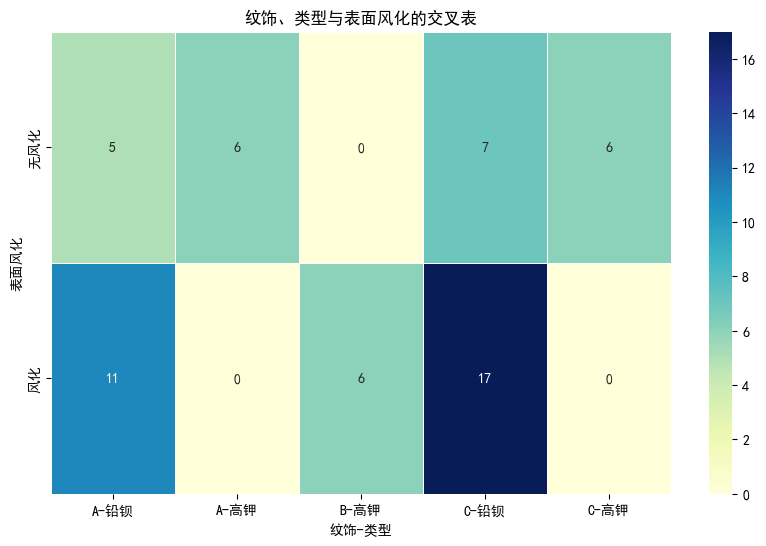

In [8]:
# 检查多元相关性
sol.cross_table(thes, '表面风化', '纹饰', '类型')

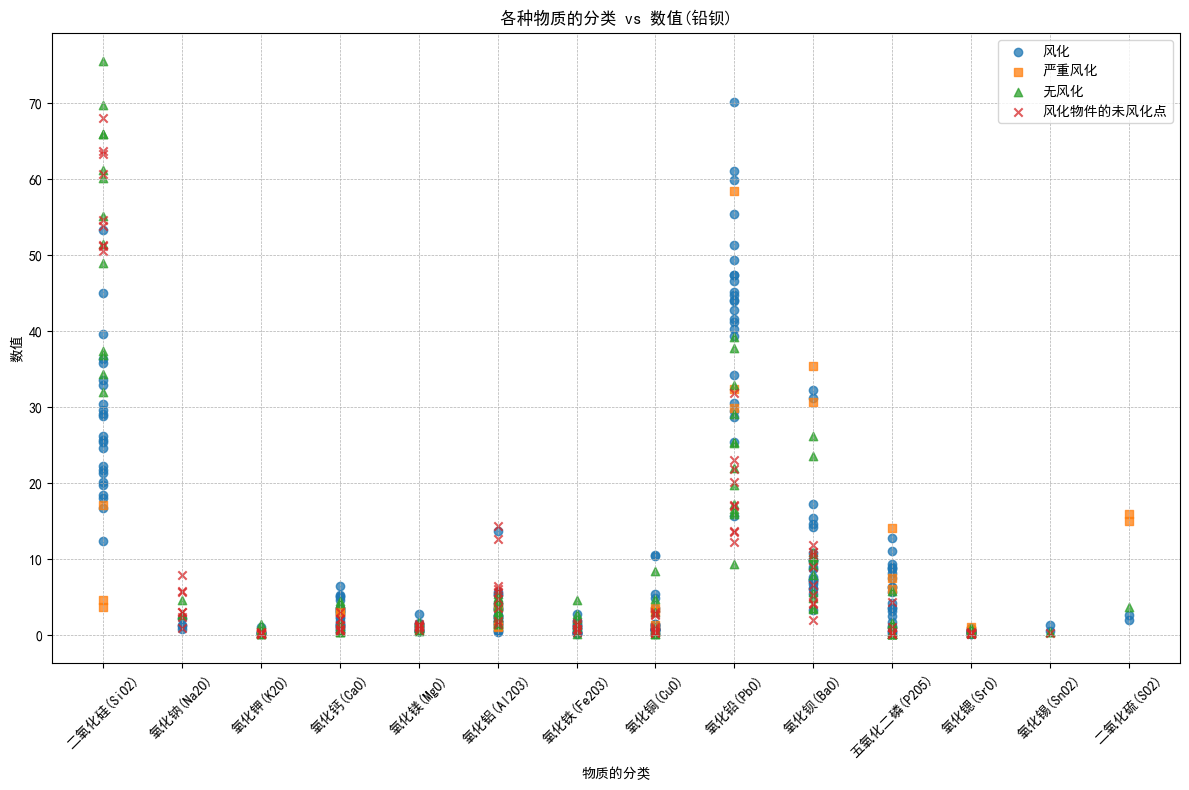

In [9]:
# 观察化学成分的分类趋势
# 导入趋势数据
trend = pd.read_csv('data/trend_composition.csv', encoding='gbk')

# 进行绘图
df = trend[trend['类型'] == '铅钡'].iloc[:, 1:16]
sol.trend1(df, '表面风化', '铅钡')

C:\Users\34282\AppData\Local\Temp\ipykernel_7472\2458898230.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg = group_comp.mean()
C:\Users\34282\AppData\Local\Temp\ipykernel_7472\2458898230.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_hp.iloc[:, 1:15] = w_hp.iloc[:, 1:15] - hp_standard
C:\Users\34282\AppData\Local\Temp\ipykernel_7472\2458898230.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

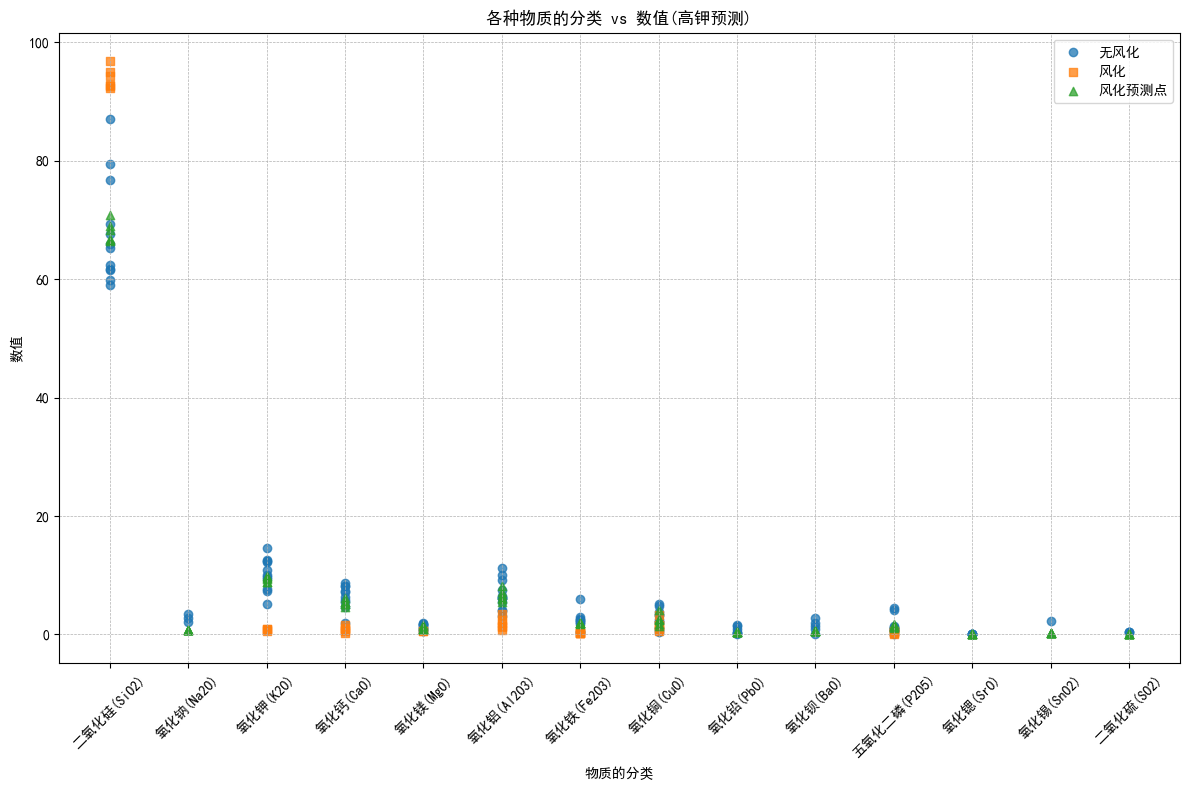

In [10]:
# 对数据进行预测 
# 读取数据
pred_comp = pd.read_csv('data/group_comp.csv')
pred_comp.fillna(0, inplace=True)

# 选取风化后的铅钡和高钾的数据
w_hp = pred_comp[(pred_comp['表面风化'] == '风化') & (pred_comp['类型'] == '高钾')]
w_lb = pred_comp[(pred_comp['表面风化'] == '风化') & (pred_comp['类型'] == '铅钡')]

# 选择预测标准
# 查看均值
avg = group_comp.mean()
# 计算预测标准
hp_standard = avg.iloc[3, :] - avg.iloc[2, :]
lb_standard = avg.iloc[1, :] - avg.iloc[0, :]

# 进行预测
w_hp.iloc[:, 1:15] = w_hp.iloc[:, 1:15] - hp_standard
w_lb.iloc[:, 1:15] = w_lb.iloc[:, 1:15] - lb_standard

# 修改标签
w_hp['表面风化'] = w_hp['表面风化'].replace('风化', '风化预测点')
w_lb['表面风化'] = w_lb['表面风化'].replace('风化', '风化预测点')

# 将新增数据添加到原数据集中进行预测
pre_data = pd.concat([trend, w_hp, w_lb], axis=0)

# 进行绘图预测
df = pre_data[pre_data['类型'] == '高钾'].iloc[:, 1:16]
sol.trend1(df, '表面风化', '高钾预测')

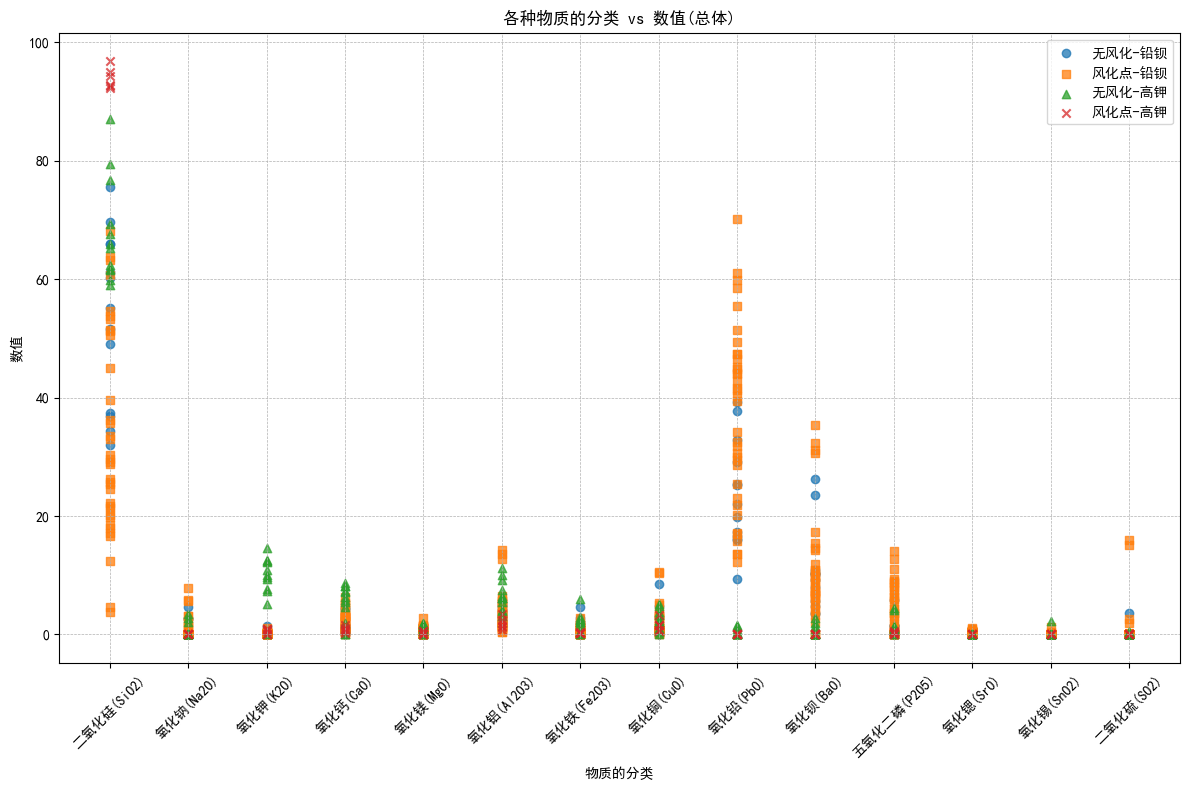

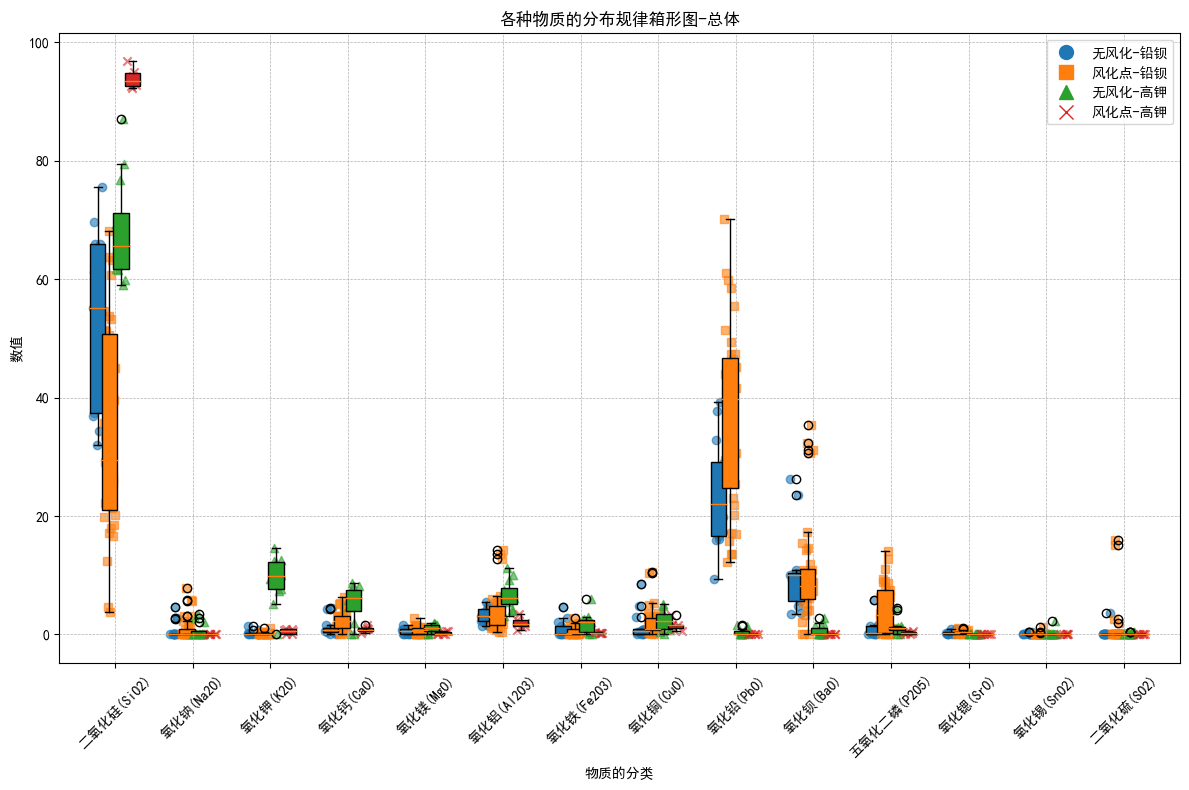

In [11]:
# 第二问
# 统计分类规律
# 导入数据
cate_data = pd.read_csv('data/group_comp.csv')
cate_data['表面风化'] = cate_data['表面风化'].replace('风化', '风化点')

# 添加分类标签
cate_data['表面风化'] = cate_data['表面风化'] + "-" + cate_data['类型']

# 进行分布图绘图
df = cate_data[cate_data['表面风化'].str.contains('风化')].iloc[:, 1:16]
sol.trend1(df, '表面风化', '总体')

# 根据上方分布图挑选优质数据绘制箱形图
sol.box_plot_trend1(df, '表面风化', '总体')

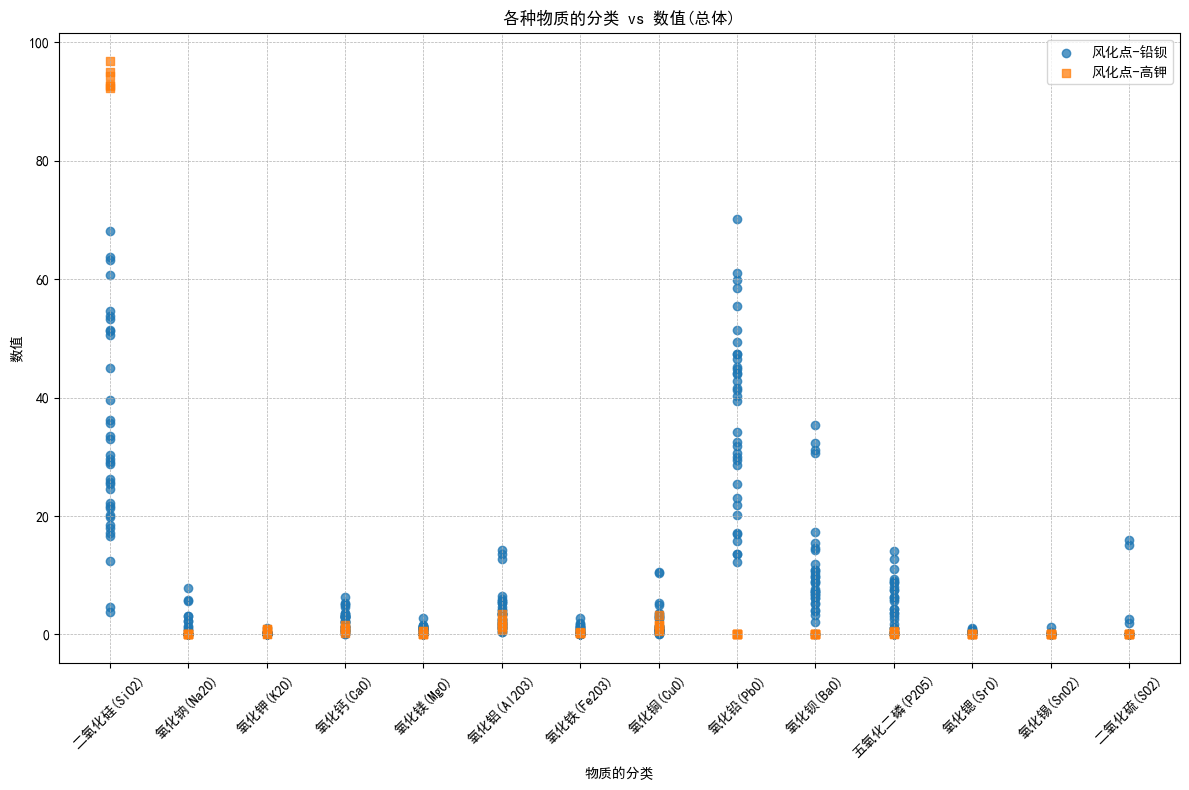

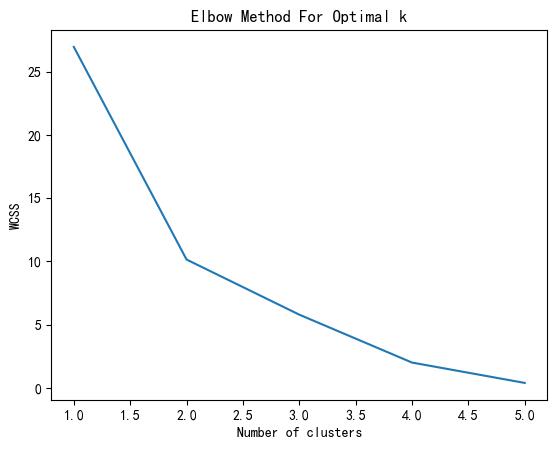

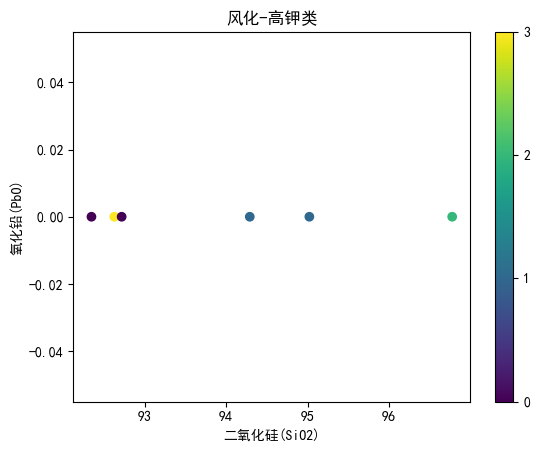

E:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


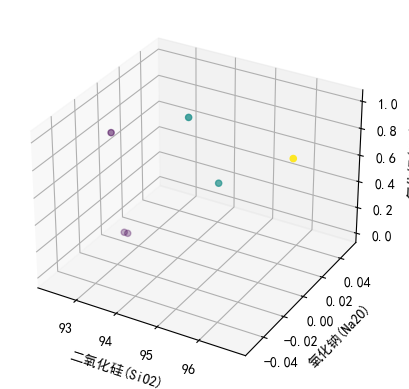

In [12]:
# 进行聚类分析
type = '高钾'
weathering = '风化'
# 导入趋势数据
trend = pd.read_csv('data/trend_composition.csv', encoding='gbk')

# 进行分布图绘图进行观察
df = cate_data[cate_data['表面风化'].str.contains('风化点')].iloc[:, 1:16]
sol.trend1(df, '表面风化', '总体')

# 选中数据
df = trend[(trend['类型'] == type) & (trend['表面风化'] == weathering)].iloc[:, :15]
df.fillna(0, inplace=True)
# 丢弃非数字列
df_numeric = df.drop('文物采样点', axis=1)

# 使用肘部法则确定k值
sol.k_mean(df, df_numeric,  '二氧化硅(SiO2)')

# 进行二元预测
sol.two_features(df, df_numeric, '二氧化硅(SiO2)', '氧化铅(PbO)', type, weathering, cate=[0, 1, 2, 3, 4, 5], k=4)

# 选择三个特征进行聚类
sol.three_features(df, '二氧化硅(SiO2)','氧化钠(Na2O)', '氧化钾(K2O)')

Accuracy: 0.88


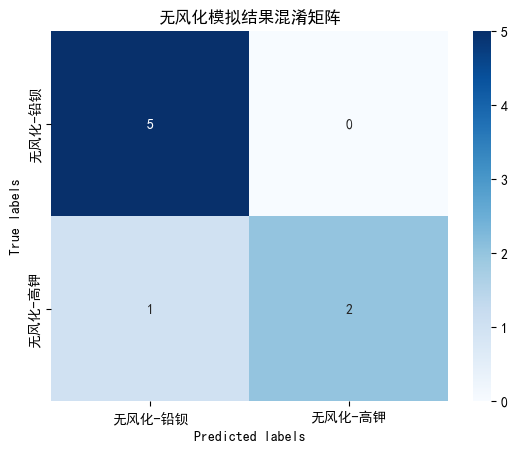

E:\python\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
E:\文档\7.理学\1.数学类\数学建模\2022年大学生数学建模大赛试题\C题 训练\建模\solution.py:247: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred['预测'] = cate_pred


In [13]:
#第三问
# 进行预测未知数据
weathering = '无风化'
# 导入我们需要预测的数据
un_cate = pd.read_csv('data/uncategorized.csv', encoding='gbk')
# 进行预测
sol.prediction(cate_data, weathering, un_cate)

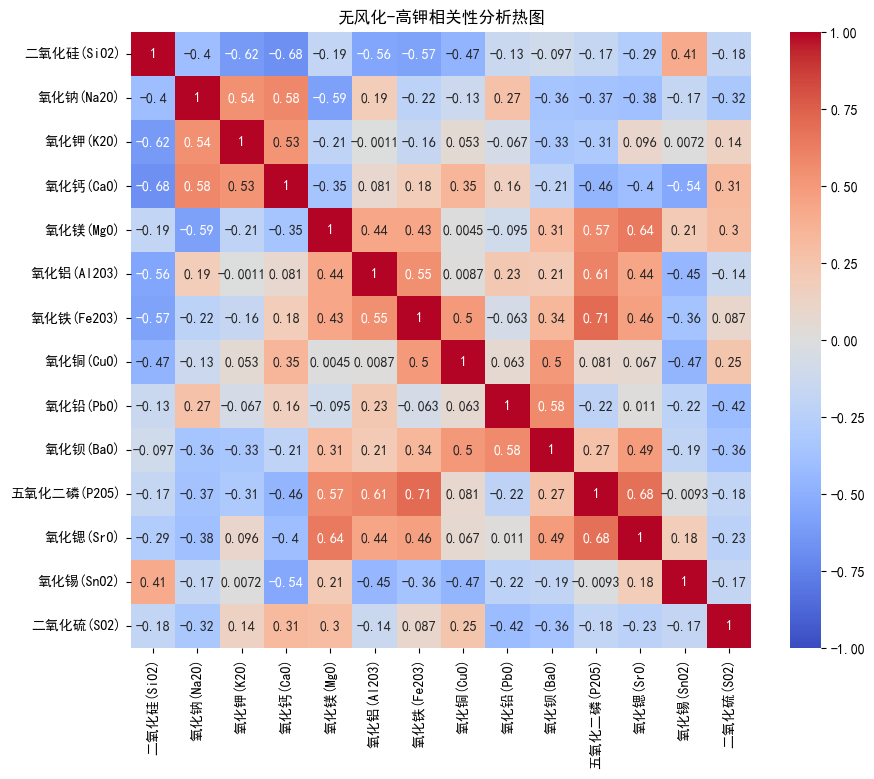

In [14]:
# 第四问
# 进行化学样品之间的相关性分析
# 导入趋势数据
trend = pd.read_csv('data/trend_composition.csv', encoding='gbk')
# 进行相关性分析并绘图
sol.corr_comp(trend, '高钾', '无风化')

C:\Users\34282\AppData\Local\Temp\ipykernel_7472\3153777634.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df_dummies.corr()


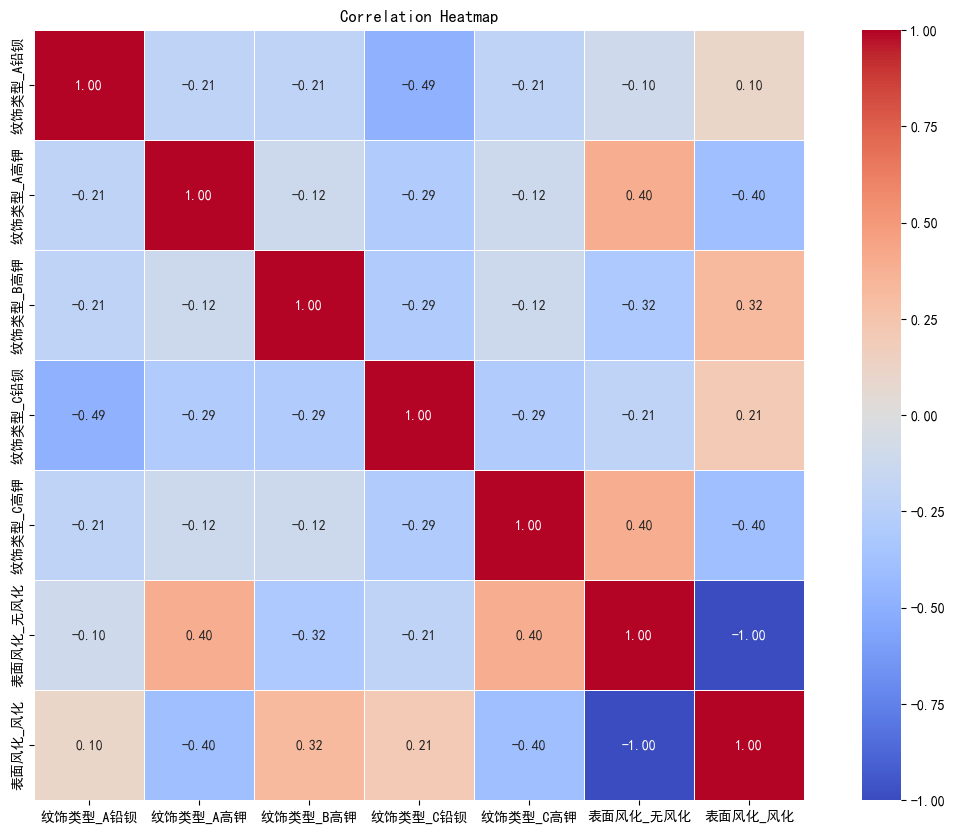

In [30]:
thes['纹饰类型'] = thes['纹饰'] + thes['类型']
# 将分类变量转为数值类型(独热编码)
df_dummies = pd.get_dummies(thes.iloc[:, 1:], columns=['纹饰类型', '表面风化'])

# 计算相关系数
correlation = df_dummies.corr()
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# 上面的数据和相关系数计算代码省略...

# 使用seaborn绘制热力图
plt.figure(figsize=(15, 10))  # 设置图的大小
sns.heatmap(correlation, annot=True, cmap="coolwarm", cbar=True, square=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# 使用PdfPages创建一个PDF文档
with PdfPages('heatmap.pdf') as pdf:
    plt.figure(figsize=(15, 10))
    sns.heatmap(correlation, annot=True, cmap="coolwarm", cbar=True, square=True, fmt=".2f", linewidths=.5)
    plt.title('Correlation Heatmap')
    
    # 保存当前图像到PDF
    pdf.savefig()

    plt.close()

In [29]:
thes

文物编号 纹饰  类型  颜色 表面风化 纹饰类型
0   1     C  高钾  蓝绿  无风化  C高钾
1   2     A  铅钡  浅蓝  风化   A铅钡
2   3     A  高钾  蓝绿  无风化  A高钾
3   4     A  高钾  蓝绿  无风化  A高钾
4   5     A  高钾  蓝绿  无风化  A高钾
5   6     A  高钾  蓝绿  无风化  A高钾
6   7     B  高钾  蓝绿  风化   B高钾
7   8     C  铅钡  紫   风化   C铅钡
8   9     B  高钾  蓝绿  风化   B高钾
9   10    B  高钾  蓝绿  风化   B高钾
10  11    C  铅钡  浅蓝  风化   C铅钡
11  12    B  高钾  蓝绿  风化   B高钾
12  13    C  高钾  浅蓝  无风化  C高钾
13  14    C  高钾  深绿  无风化  C高钾
14  15    C  高钾  浅蓝  无风化  C高钾
15  16    C  高钾  浅蓝  无风化  C高钾
16  17    C  高钾  浅蓝  无风化  C高钾
17  18    A  高钾  深蓝  无风化  A高钾
19  20    A  铅钡  浅蓝  无风化  A铅钡
20  21    A  高钾  蓝绿  无风化  A高钾
21  22    B  高钾  蓝绿  风化   B高钾
22  23    A  铅钡  蓝绿  风化   A铅钡
23  24    C  铅钡  紫   无风化  C铅钡
24  25    C  铅钡  浅蓝  风化   C铅钡
25  26    C  铅钡  紫   风化   C铅钡
26  27    B  高钾  蓝绿  风化   B高钾
27  28    A  铅钡  浅蓝  风化   A铅钡
28  29    A  铅钡  浅蓝  风化   A铅钡
29  30    A  铅钡  深蓝  无风化  A铅钡
30  31    C  铅钡  紫   无风化  C铅钡
31  32    C  铅钡  浅绿  无风化  C铅钡
32  33    C  铅钡  深绿  无风化  C铅钡
33  34    C  铅钡  深绿  风化   C铅钡
34  35    C  铅钡  浅绿  无风化  C铅钡
35  36    C  铅钡  深绿  风化   C铅钡
36  37    C  铅钡  深绿  无风化  C铅钡
37  38    C  铅钡  深绿  风化   C铅钡
38  39    C  铅钡  深绿  风化   C铅钡
40  41    C  铅钡  浅绿  风化   C铅钡
41  42    A  铅钡  浅蓝  风化   A铅钡
42  43    C  铅钡  浅蓝  风化   C铅钡
43  44    A  铅钡  浅蓝  风化   A铅钡
44  45    A  铅钡  浅蓝  无风化  A铅钡
45  46    A  铅钡  浅蓝  无风化  A铅钡
46  47    A  铅钡  浅蓝  无风化  A铅钡
48  49    A  铅钡  黑   风化   A铅钡
49  50    A  铅钡  黑   风化   A铅钡
50  51    C  铅钡  浅蓝  风化   C铅钡
51  52    C  铅钡  浅蓝  风化   C铅钡
52  53    A  铅钡  浅蓝  风化   A铅钡
53  54    C  铅钡  浅蓝  风化   C铅钡
54  55    C  铅钡  绿   无风化  C铅钡
55  56    C  铅钡  蓝绿  风化   C铅钡
56  57    C  铅钡  蓝绿  风化   C铅钡